# Fire response traits in plants from field samples

This script contains examples of R code to query tables in the database

## Load libraries

In [1]:
library(RPostgreSQL)
library(ggplot2)
##library(forcats)
library(dplyr)
#library(data.table)
require(tidyr)

Loading required package: DBI


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr



## Connect to the database

Read database credentials

In [2]:
if (file.exists("../secrets/database.ini")) {
  tmp <- readLines("../secrets/database.ini")[-1]
  tmp <- strsplit(tmp,'=',fixed=2)
  dbinfo <- unlist(lapply(tmp,function(x) x[2]))
  names(dbinfo) <- unlist(lapply(tmp,function(x) x[1]))
  dbinfo <- data.frame(t(dbinfo),stringsAsFactors=F)
   rm(tmp)
} else {
  cat("No database information found")
}

Connection to the postgresql server (remember to update .pgpass file)

In [3]:
drv <- dbDriver("PostgreSQL") ## 
con <- dbConnect(drv, dbname = dbinfo$database,
                 host = dbinfo$host, port = dbinfo$port,
                 user = dbinfo$user)

In [4]:
qry <- 
'SELECT visit_id as site_label, visit_date
FROM form.field_visit'
site.visits <- dbGetQuery(con, qry)

In [5]:
qry <- 
'SELECT site_label, earliest_date,latest_date, how_inferred, cause_of_ignition
FROM form.fire_history'
fire.history <- dbGetQuery(con, qry)


In [6]:
dts <- fire.history %>% transmute(site_label,date=earliest_date,event='fire') %>% 
bind_rows(site.visits %>% transmute(site_label,date=visit_date,event='visit'))


In [7]:
as.Date(c('2000-01-01','2021-01-01'))

[1] "2000-01-01" "2021-01-01"

Warning message:
“Removed 49 rows containing missing values (`geom_point()`).”


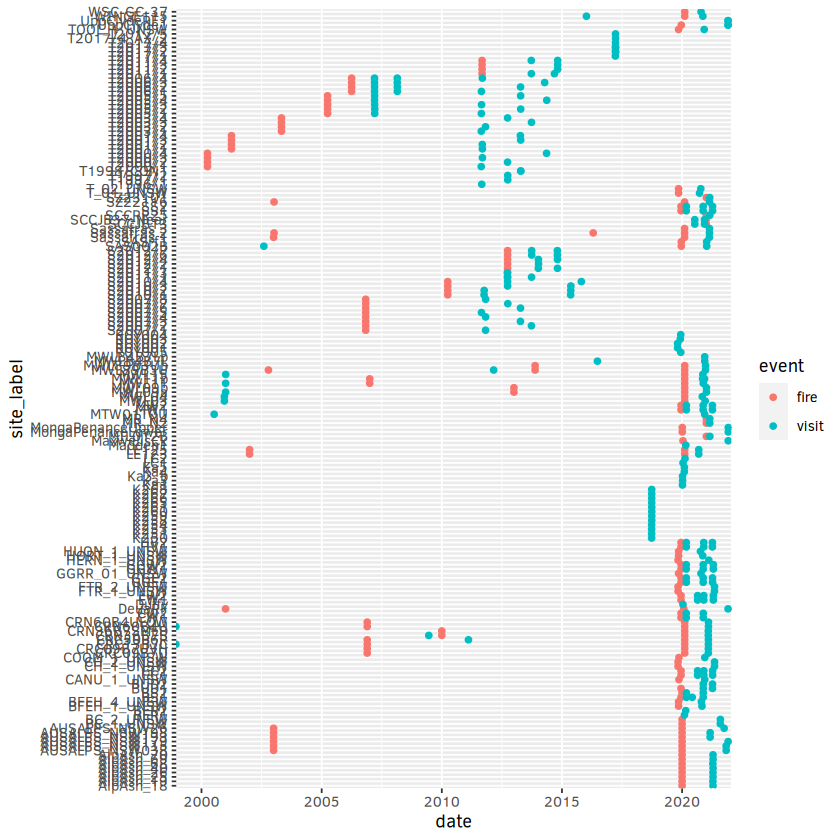

In [8]:
ggplot(dts) + 
    geom_point(aes(x=date,y=site_label,colour=event)) +
    coord_cartesian(xlim=as.Date(c('2000-01-01','2021-01-01')))

In [9]:
saveRDS(file='../data/fire-history.rds',fire.history)
saveRDS(file='../data/site-visits.rds',site.visits)

In [10]:
dbDisconnect(con)

[1] TRUE